In [1]:
## Importamos las librerías que utilizaremos.
import numpy as np
import random as rand
import math as mt
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Creación del programa de Regresión Lineal
def GenVander(data,grado):
    
    # Hacemos un array los datos
    data = np.array(data)
    
    # Aumentamos el valor del grado en 1 porque es la cantidad que usaremos.
    grado = grado +1
    
    #Definimos la dimensión de la matrix
    Vander = np.zeros((len(data[:,0]), grado))
    
    # Llenaremos la matriz de Vandermonde con los valores correspondientes
    for i in range(len(data[:,0])):
        for j in range(grado):
            Vander[i][j] = data[i][0]**j
    
    return Vander

In [3]:
#Creado el programa para generar la matriz de Vandermonde, procedemos a tomar uno de los programas ya creados para resolver sistemas de ecuaciones. Escogeremos Cholesky
def comp_cuad(matrix):
    if len(matrix[0]) == len(matrix[:,0]):
        return True
    else:
        return False

In [4]:
def comp_inv(matrix):
    if np.linalg.det(matrix) == 0:
        return False
    else:
        return True

In [5]:
#Código de comprobación de simetría
def comp_symme(matrix):
    for i in range(len(matrix[0])):
        for j in range(i,len(matrix[:,0])):
            if matrix[i][j]==matrix[j][i]:
                value=True
            else:
                return False
    return value

In [6]:
#código de comprobación de definido-positiva

def comp_posit_def(matrix):
    for i in range(len(np.linalg.eig(matrix)[0])):
        if np.linalg.eig(matrix)[0][i]>0:
            value=True
        else:
            return False
    return value

In [7]:
## codigo auxiliar de suma

def suma_cho_1(index, matrix):
    if index==0:
        return 0
    else:
        suma=0
        for k in range(index):
            suma += matrix[index][k]**2
        return suma

In [8]:
#Código auxiliar de suma 2

def suma_cho_2(index1, index2, matrix):
    if index2==0:
        return 0
    else:
        suma=0
        for k in range(index1):
            suma += matrix[index1][k]*matrix[index2][k]
        return suma

In [9]:
def Cholesky(matrix):
    matrix = np.array(matrix)
    if comp_cuad(matrix):
        if comp_inv(matrix):
            if comp_symme(matrix):
                if comp_posit_def(matrix):
    
    
                    lower=np.zeros((len(matrix[0]),len(matrix[:,0])))

                    for i in range(len(matrix[0])):
                        for j in range(i,len(matrix[0])):
                            if i==j:
                                lower[i][i] = mt.sqrt(matrix[i][i] - suma_cho_1(i,lower))
                            else:
                                lower[j][i] = (1/lower[i][i])*(matrix[i][j] - suma_cho_2(i,j,lower))
                    return lower
                else:
                    print("No es positivo-definida")
            else:
                print("No es una matriz simétrica")
        else:
            print("No tiene inversa")
    else:
        print("No es una matriz cuadrada")

In [10]:
# Creamos una función que acepte una matrix y un vector y devuelva la solución al
# sistema Mx=b
# Primero creamos dos sumas auxiliares que nos ayudarán a encontrar la solución para
# matrices triangulares
def back_sum_inf(matrix,vector,index):
    matrix=np.array(matrix)
    #definimos una suma auxiliar
    if index==0:
        return 0
    suma=0
    for i in range(index):
        suma += matrix[index][i]*vector[i]
    return suma

In [11]:
# Ahora para las matrices superiores
def back_sum_sup(matrix,vector,index):
    matrix=np.array(matrix)
    suma=0
    if index==0:
        return 0
    for i in range(len(matrix[0])-index):
        suma+= matrix[len(matrix)-index-1][len(matrix)-i-1]*vector[len(matrix)-i-1]
    return suma

In [12]:
def solv_w_chol(matrix,b):
    L=Cholesky(matrix)
    LT=L.transpose()
    Y=np.zeros(len(matrix))
    X=np.zeros(len(matrix))
    for i in range(len(Y)):
        Y[i] = (1/L[i][i])*(b[i]-back_sum_inf(L,Y,i))
    for i in range(len(X)):
        j = len(matrix)-i-1
        X[j] = (1/LT[j][j])*(Y[j] - back_sum_sup(LT,X,i))
    
    return X

In [13]:
#Ahora que ya tenemos una función que arroja el vector resultado por medio de Cholesky, y una función que genera la matriz de Vandermonde,
#procedemos a programar el polinomio dados los coeficientes.
def poli(c,x):
    suma=0
    for i in range(len(c)):
        suma += c[i]*x**i
    return suma

In [14]:
#Aqui se expresa el sistema de ecuaciones a resolver 

def Vanderdome_regres(data,grado):
    #volvemos a los datos array de numpy
    data=np.array(data)
    #Definimos la matriz de vanderdone
    V=GenVander(data,grado)
    #print(f'Matriz Vandermonde: \n {V}')
    #generamos la traspuesta
    VT=V.transpose()
    #print(f'Matriz Vandermonde Transpuesta: \n {VT}')
    #Generamos la multiplicación
    M=np.matmul(VT,V)
    #print(f'V * VT: \n {M}')
    #Obetenemos el vector V^TY
    Y=np.matmul(VT,data[:,1])
    #print(f'Vector Y: \n {Y}')
    #Buscamos que nos arroje la solución al sistema Mc=y
    C=solv_w_chol(M,Y)
    #por último, le pedimos nos de las constantes
    return C

In [15]:
#Primer archivo 
#Al correr por segunda vez el notebook ya no es necesario ejecutar esta celda porque el archivo ya se lee correctamente 
"""
with open('Resources/perfg-g64-u3-17-00-al.txt', 'r') as file :
    filedata = file.read()
    filedata = filedata.replace(' ', ',')
    filedata = filedata.replace(',,', ',')

with open('Resources/perfg-g64-u3-17-00-alV2.txt', 'w') as file:
    file.write(filedata)
"""

"\nwith open('Resources/perfg-g64-u3-17-00-al.txt', 'r') as file :\n    filedata = file.read()\n    filedata = filedata.replace(' ', ',')\n    filedata = filedata.replace(',,', ',')\n\nwith open('Resources/perfg-g64-u3-17-00-alV2.txt', 'w') as file:\n    file.write(filedata)\n"

In [16]:
primer_perfil = pd.read_csv("Resources/perfg-g64-u3-17-00-alV2.txt", header=None)
#primer_perfil.head()

In [17]:
primer_renglon = primer_perfil.iloc[0,:].tolist()

In [18]:
x = np.arange(1,25)


In [19]:
pares_numeros1 = []
for i,j in enumerate(x):
    par = [x[i],primer_renglon[i]]
    pares_numeros1.append(par)

In [20]:
pares_numeros1 = np.array(pares_numeros1)
pares_numeros1.shape

(24, 2)

In [21]:
def p_3(pares_numeros, x):
    return poli(Vanderdome_regres(pares_numeros,3),x)

In [24]:
#Segundo archivo  
"""
with open('Resources/perfg-g64-u3-16-07-al.txt', 'r') as file :
    filedata = file.read()
    filedata = filedata.replace(' ', ',')
    filedata = filedata.replace(',,', ',')

with open('Resources/perfg-g64-u3-16-07-alV2.txt', 'w') as file:
    file.write(filedata)
"""

"\nwith open('Resources/perfg-g64-u3-16-07-al.txt', 'r') as file :\n    filedata = file.read()\n    filedata = filedata.replace(' ', ',')\n    filedata = filedata.replace(',,', ',')\n\nwith open('Resources/perfg-g64-u3-16-07-alV2.txt', 'w') as file:\n    file.write(filedata)\n"

In [25]:
segundo_perfil = pd.read_csv("Resources/perfg-g64-u3-16-07-alV2.txt", header=None)
#segundo_perfil.head()

In [26]:
segundo_renglon = segundo_perfil.iloc[0,1:].tolist()
x = np.arange(1,25)
pares_numeros2 = []
for i,j in enumerate(x):
    par = [x[i],segundo_renglon[i]]
    pares_numeros2.append(par)
    
pares_numeros2 = np.array(pares_numeros2)
#pares_numeros

In [27]:
#Tercer archivo
"""
with open('Resources/perfg-g64-u3-17-05-al.txt', 'r') as file :
    filedata = file.read()
    filedata = filedata.replace(' ', ',')
    filedata = filedata.replace(',,', ',')

with open('Resources/perfg-g64-u3-17-05-al.txtV2', 'w') as file:
    file.write(filedata)
"""

"\nwith open('Resources/perfg-g64-u3-17-05-al.txt', 'r') as file :\n    filedata = file.read()\n    filedata = filedata.replace(' ', ',')\n    filedata = filedata.replace(',,', ',')\n\nwith open('Resources/perfg-g64-u3-17-05-al.txtV2', 'w') as file:\n    file.write(filedata)\n"

In [28]:
tercer_perfil = pd.read_csv("Resources/perfg-g64-u3-17-05-al.txtV2", header=None)
#tercer_perfil.head()

In [29]:
tercer_renglon = tercer_perfil.iloc[0,1:].tolist()
x = np.arange(1,25)
pares_numeros3 = []
for i,j in enumerate(x):
    par = [x[i],tercer_renglon[i]]
    pares_numeros3.append(par)
    
pares_numeros3 = np.array(pares_numeros3)
#pares_numeros

In [30]:
#Cuarto archivo  
"""
with open('Resources/perfg-g64-u3-18-00-al.txt', 'r') as file :
    filedata = file.read()
    filedata = filedata.replace(' ', ',')
    filedata = filedata.replace(',,', ',')

with open('Resources/perfg-g64-u3-18-00-al.txtV2', 'w') as file:
    file.write(filedata)
"""

"\nwith open('Resources/perfg-g64-u3-18-00-al.txt', 'r') as file :\n    filedata = file.read()\n    filedata = filedata.replace(' ', ',')\n    filedata = filedata.replace(',,', ',')\n\nwith open('Resources/perfg-g64-u3-18-00-al.txtV2', 'w') as file:\n    file.write(filedata)\n"

In [31]:
cuarto_perfil = pd.read_csv("Resources/perfg-g64-u3-18-00-al.txtV2", header=None)
#cuarto_perfil.head()

In [32]:
cuarto_renglon = cuarto_perfil.iloc[0,1:].tolist()
x = np.arange(1,25)
pares_numeros4 = []
for i,j in enumerate(x):
    par = [x[i],cuarto_renglon[i]]
    pares_numeros4.append(par)
    
pares_numeros4 = np.array(pares_numeros4)
pares_numeros4.shape

(24, 2)

In [34]:
#Quinto archivo 
""""
with open('Resources/perfg-g64-u3-18-01-al.txt', 'r') as file :
    filedata = file.read()
    filedata = filedata.replace(' ', ',')
    filedata = filedata.replace(',,', ',')

with open('Resources/perfg-g64-u3-18-01-al.txtV2', 'w') as file:
    file.write(filedata)
"""

'"\nwith open(\'Resources/perfg-g64-u3-18-01-al.txt\', \'r\') as file :\n    filedata = file.read()\n    filedata = filedata.replace(\' \', \',\')\n    filedata = filedata.replace(\',,\', \',\')\n\nwith open(\'Resources/perfg-g64-u3-18-01-al.txtV2\', \'w\') as file:\n    file.write(filedata)\n'

In [35]:
quinto_perfil = pd.read_csv("Resources/perfg-g64-u3-18-01-al.txtV2", header=None)
#quinto_perfil.head()

In [36]:
quinto_renglon = quinto_perfil.iloc[0,1:].tolist()
x = np.arange(1,25)
pares_numeros5 = []
for i,j in enumerate(x):
    par = [x[i],quinto_renglon[i]]
    pares_numeros5.append(par)
    
pares_numeros5 = np.array(pares_numeros5)
pares_numeros5.shape

(24, 2)

In [37]:
#Sexto archivo
"""
with open('Resources/perfg-g64-u3-18-02-al.txt', 'r') as file :
    filedata = file.read()
    filedata = filedata.replace(' ', ',')
    filedata = filedata.replace(',,', ',')

with open('Resources/perfg-g64-u3-18-02-al.txtV2', 'w') as file:
    file.write(filedata)
"""

"\nwith open('Resources/perfg-g64-u3-18-02-al.txt', 'r') as file :\n    filedata = file.read()\n    filedata = filedata.replace(' ', ',')\n    filedata = filedata.replace(',,', ',')\n\nwith open('Resources/perfg-g64-u3-18-02-al.txtV2', 'w') as file:\n    file.write(filedata)\n"

In [38]:
sexto_perfil = pd.read_csv("Resources/perfg-g64-u3-18-02-al.txtV2", header=None)
#sexto_perfil.head()

In [39]:
sexto_renglon = sexto_perfil.iloc[0,0:].tolist()
x = np.arange(1,25)
pares_numeros6 = []
for i,j in enumerate(x):
    par = [x[i],sexto_renglon[i]]
    pares_numeros6.append(par)
    
pares_numeros6 = np.array(pares_numeros6)
pares_numeros6.shape

(24, 2)

In [40]:
#Septimo archivo  
"""
with open('Resources/perfg-g64-u3-18-03-al.txt', 'r') as file :
    filedata = file.read()
    filedata = filedata.replace(' ', ',')
    filedata = filedata.replace(',,', ',')

with open('Resources/perfg-g64-u3-18-03-al.txtV2', 'w') as file:
    file.write(filedata)
"""

"\nwith open('Resources/perfg-g64-u3-18-03-al.txt', 'r') as file :\n    filedata = file.read()\n    filedata = filedata.replace(' ', ',')\n    filedata = filedata.replace(',,', ',')\n\nwith open('Resources/perfg-g64-u3-18-03-al.txtV2', 'w') as file:\n    file.write(filedata)\n"

In [41]:
septimo_perfil = pd.read_csv("Resources/perfg-g64-u3-18-03-al.txtV2", header=None)
#septimo_perfil.head()

In [42]:
septimo_renglon = septimo_perfil.iloc[0,0:].tolist()
x = np.arange(1,25)
pares_numeros7 = []
for i,j in enumerate(x):
    par = [x[i],septimo_renglon[i]]
    pares_numeros7.append(par)
    
pares_numeros7 = np.array(pares_numeros7)
pares_numeros7.shape

(24, 2)

In [43]:
#Octavo archivo  
"""
with open('Resources/perfg-g64-u3-18-04-al.txt', 'r') as file :
    filedata = file.read()
    filedata = filedata.replace(' ', ',')
    filedata = filedata.replace(',,', ',')

with open('Resources/perfg-g64-u3-18-04-al.txtV2', 'w') as file:
    file.write(filedata)
"""

"\nwith open('Resources/perfg-g64-u3-18-04-al.txt', 'r') as file :\n    filedata = file.read()\n    filedata = filedata.replace(' ', ',')\n    filedata = filedata.replace(',,', ',')\n\nwith open('Resources/perfg-g64-u3-18-04-al.txtV2', 'w') as file:\n    file.write(filedata)\n"

In [44]:
octavo_perfil = pd.read_csv("Resources/perfg-g64-u3-18-04-al.txtV2", header=None)
#octavo_perfil.head()

In [45]:
octavo_renglon = octavo_perfil.iloc[0,1:].tolist()
x = np.arange(1,25)
pares_numeros8 = []
for i,j in enumerate(x):
    par = [x[i],octavo_renglon[i]]
    pares_numeros8.append(par)
    
pares_numeros8 = np.array(pares_numeros8)
pares_numeros8.shape

(24, 2)

In [46]:
#Noveno archivo  
"""
with open('Resources/perfg-g64-u3-18-05-al.txt', 'r') as file :
    filedata = file.read()
    filedata = filedata.replace(' ', ',')
    filedata = filedata.replace(',,', ',')

with open('Resources/perfg-g64-u3-18-05-al.txtV2', 'w') as file:
    file.write(filedata)
"""

"\nwith open('Resources/perfg-g64-u3-18-05-al.txt', 'r') as file :\n    filedata = file.read()\n    filedata = filedata.replace(' ', ',')\n    filedata = filedata.replace(',,', ',')\n\nwith open('Resources/perfg-g64-u3-18-05-al.txtV2', 'w') as file:\n    file.write(filedata)\n"

In [47]:
noveno_perfil = pd.read_csv("Resources/perfg-g64-u3-18-05-al.txtV2", header=None)
#noveno_perfil.head()

In [48]:
noveno_renglon = noveno_perfil.iloc[0,0:].tolist()
x = np.arange(1,25)
pares_numeros9 = []
for i,j in enumerate(x):
    par = [x[i],noveno_renglon[i]]
    pares_numeros9.append(par)
    
pares_numeros9 = np.array(pares_numeros9)
pares_numeros9.shape

(24, 2)

In [49]:
#Decimo archivo  
"""
with open('Resources/perfg-g64-u3-21-02-al.txt', 'r') as file :
    filedata = file.read()
    filedata = filedata.replace(' ', ',')
    filedata = filedata.replace(',,', ',')

with open('Resources/perfg-g64-u3-21-02-al.txtV2', 'w') as file:
    file.write(filedata)
"""

"\nwith open('Resources/perfg-g64-u3-21-02-al.txt', 'r') as file :\n    filedata = file.read()\n    filedata = filedata.replace(' ', ',')\n    filedata = filedata.replace(',,', ',')\n\nwith open('Resources/perfg-g64-u3-21-02-al.txtV2', 'w') as file:\n    file.write(filedata)\n"

In [50]:
decimo_perfil = pd.read_csv("Resources/perfg-g64-u3-21-02-al.txtV2", header=None)
#decimo_perfil.head()

In [51]:
decimo_renglon = decimo_perfil.iloc[0,1:].tolist()
x = np.arange(1,25)
pares_numeros10 = []
for i,j in enumerate(x):
    par = [x[i],decimo_renglon[i]]
    pares_numeros10.append(par)
    
pares_numeros10 = np.array(pares_numeros10)
pares_numeros10.shape

(24, 2)

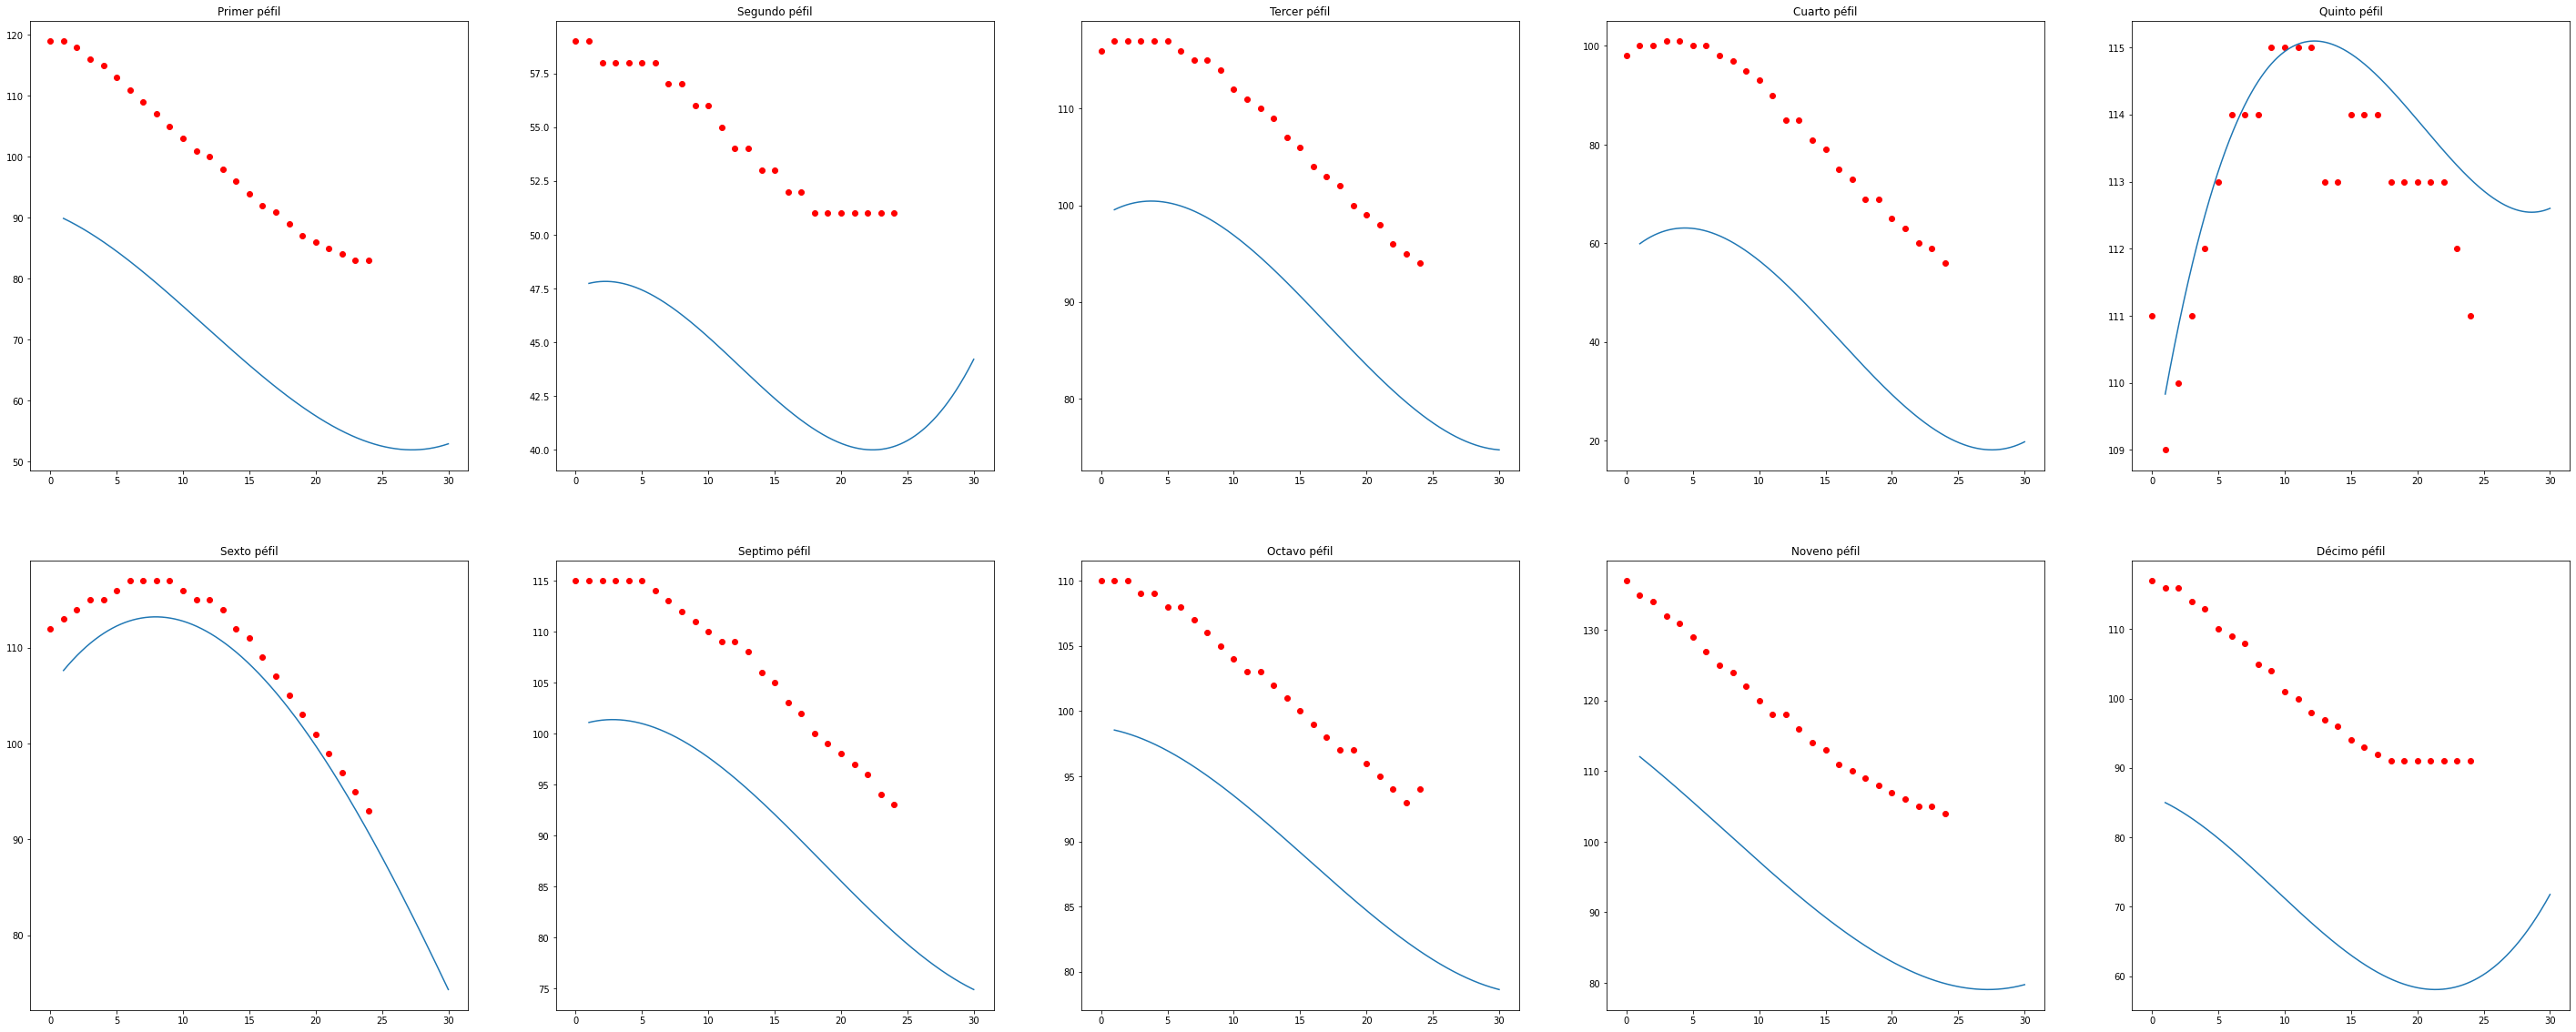

In [52]:
#Mostramos los ajustes de los diez perfiles en una sola gráfica
t=np.arange(1,30,0.002)
figure, axis = plt.subplots(2, 5, figsize=(50,20))
axis[0,0].plot(primer_renglon, 'ro')
axis[0,0].plot(t, p_3(pares_numeros1, t))
axis[0,0].set_title('Primer péfil')
axis[0,1].plot(segundo_renglon, 'ro')
axis[0,1].plot(t, p_3(pares_numeros2, t))
axis[0,1].set_title('Segundo péfil')
axis[0,2].plot(tercer_renglon, 'ro')
axis[0,2].plot(t, p_3(pares_numeros3, t))
axis[0,2].set_title('Tercer péfil')
axis[0,3].plot(cuarto_renglon, 'ro')
axis[0,3].plot(t, p_3(pares_numeros4, t))
axis[0,3].set_title('Cuarto péfil')
axis[0,4].plot(quinto_renglon, 'ro')
axis[0,4].plot(t, p_3(pares_numeros5, t))
axis[0,4].set_title('Quinto péfil')
axis[1,0].plot(sexto_renglon, 'ro')
axis[1,0].plot(t, p_3(pares_numeros6, t))
axis[1,0].set_title('Sexto péfil')
axis[1,1].plot(septimo_renglon, 'ro')
axis[1,1].plot(t, p_3(pares_numeros7, t))
axis[1,1].set_title('Septimo péfil')
axis[1,2].plot(octavo_renglon, 'ro')
axis[1,2].plot(t, p_3(pares_numeros8, t))
axis[1,2].set_title('Octavo péfil')
axis[1,3].plot(noveno_renglon, 'ro')
axis[1,3].plot(t, p_3(pares_numeros9, t))
axis[1,3].set_title('Noveno péfil')
axis[1,4].plot(decimo_renglon, 'ro')
axis[1,4].plot(t, p_3(pares_numeros10, t))
axis[1,4].set_title('Décimo péfil')
plt.show()

In [53]:
#Error SSE 

t = np.arange(1,26,1)
p1 = p_3(pares_numeros1,t)
p2 = p_3(pares_numeros2,t)
p3 = p_3(pares_numeros3,t)
p4 = p_3(pares_numeros4,t)
p5 = p_3(pares_numeros5,t)
p6 = p_3(pares_numeros6,t)
p7 = p_3(pares_numeros7,t)
p8 = p_3(pares_numeros8,t)
p9 = p_3(pares_numeros9,t)
p10 = p_3(pares_numeros10,t)

sse1 = np.sum((p1 - primer_renglon)**2)
sse2 = np.sum((p2 - segundo_renglon)**2)
sse3 = np.sum((p3 - tercer_renglon)**2)
sse4 = np.sum((p4 - cuarto_renglon)**2)
sse5 = np.sum((p5 - quinto_renglon)**2)
sse6 = np.sum((p6 - sexto_renglon)**2)
sse7 = np.sum((p7 - septimo_renglon)**2)
sse8 = np.sum((p8 - octavo_renglon)**2)
sse9 = np.sum((p9 - noveno_renglon)**2)
sse10 = np.sum((p10 - decimo_renglon)**2)
print('***********************************************************************')
print(f'\nEl error SSE del polinomio para el primer pérfil es de {sse1:,.3f}')
print(f'El error SSE del polinomio para el segundo pérfil es de {sse2:,.3f}')
print(f'El error SSE del polinomio para el tercer pérfil es de {sse3:,.3f}')
print(f'El error SSE del polinomio para el cuarto pérfil es de {sse4:,.3f}')
print(f'El error SSE del polinomio para el quinto pérfil es de {sse5:,.3f}')
print(f'El error SSE del polinomio para el sexto pérfil es de {sse6:,.3f}')
print(f'El error SSE del polinomio para el séptimo pérfil es de {sse7:,.3f}')
print(f'El error SSE del polinomio para el octavo pérfil es de {sse8:,.3f}')
print(f'El error SSE del polinomio para el noveno pérfil es de {sse9:,.3f}')
print(f'El error SSE del polinomio para el décimo pérfil es de {sse10:,.3f}\n')
print('***********************************************************************')


***********************************************************************

El error SSE del polinomio para el primer pérfil es de 22,425.028
El error SSE del polinomio para el segundo pérfil es de 2,937.357
El error SSE del polinomio para el tercer pérfil es de 6,952.189
El error SSE del polinomio para el cuarto pérfil es de 36,008.614
El error SSE del polinomio para el quinto pérfil es de 28.916
El error SSE del polinomio para el sexto pérfil es de 360.976
El error SSE del polinomio para el séptimo pérfil es de 4,775.715
El error SSE del polinomio para el octavo pérfil es de 3,485.916
El error SSE del polinomio para el noveno pérfil es de 15,443.657
El error SSE del polinomio para el décimo pérfil es de 26,227.942

***********************************************************************


In [54]:
#Como lo muestra la gráfica y los resultados de los errores,
#polinomio ajustado para el quinto pérfil es el que más certeza tiene.


In [55]:
#Promedio de cada uno de los primeros renglones de los diez arhcivos 
pares_promedios = []
for i, j in enumerate(x):
    promedio = 0
    promedio = (primer_renglon[i] + segundo_renglon[i] + tercer_renglon[i]
                +cuarto_renglon[i] + quinto_renglon[i] + sexto_renglon[i] + septimo_renglon[i]+ 
                octavo_renglon[i] + noveno_renglon[i] + decimo_renglon[i]) / 10.0
    par = [x[i], promedio ]
    pares_promedios.append(par)

pares_promedios = np.array(pares_promedios)
pares_promedios.shape

(24, 2)

In [56]:
t = np.arange(1,25,1)
c = p_3(pares_numeros1, t)
print(c)

[89.89755329 88.76548343 87.47896608 86.05402661 84.50669037 82.85298273
 81.10892903 79.29055465 77.41388495 75.49494527 73.54976099 71.59435745
 69.64476003 67.71699408 65.82708495 63.99105802 62.22493863 60.54475215
 58.96652394 57.50627935 56.18004375 55.00384249 53.99370094 53.16564446]


Text(0.5, 1.0, 'Ajuste Polinomial Promedio')

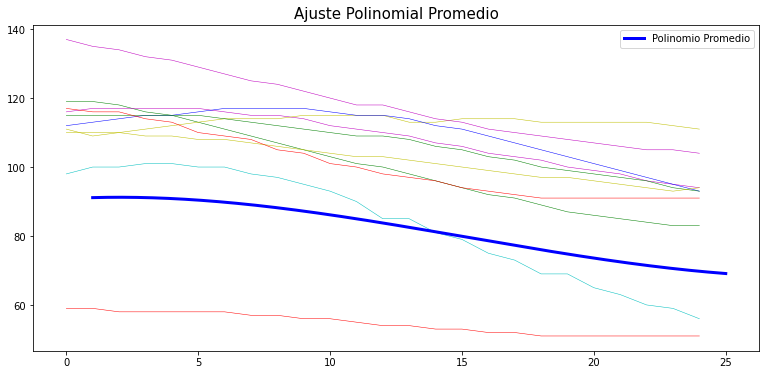

In [57]:
t=np.arange(1,25,0.0001)
plt.figure(figsize=(13, 6))
plt.plot(primer_renglon, c='g', linewidth=0.5)
plt.plot(segundo_renglon, c='r', linewidth=0.5)
plt.plot(tercer_renglon, c='m', linewidth=0.5)
plt.plot(cuarto_renglon, c='c', linewidth=0.5)
plt.plot(quinto_renglon, c='y', linewidth=0.5)
plt.plot(sexto_renglon, c='b', linewidth=0.5)
plt.plot(septimo_renglon, c='g', linewidth=0.5)
plt.plot(octavo_renglon, c='y', linewidth=0.5)
plt.plot(noveno_renglon, c='m', linewidth=0.5)
plt.plot(decimo_renglon, c='r', linewidth=0.5)

plt.plot(t, p_3(pares_promedios, t), linewidth= 3, c= 'b', label = 'Polinomio Promedio')
plt.legend()
plt.title("Ajuste Polinomial Promedio", fontsize=15)